# Curso: Aprendizaje Automático - Proyecto final (preliminar al 2 Sept)
## Alonso Nuñez / Sergio Castillo
## Fecha de entrega: 9 setiembre 2019

## Importar dependencias y cargar el dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

import keras
from keras.utils import np_utils

data =  pd.read_csv('https://raw.githubusercontent.com/anunezcr/datasets/master/clientes_diarios_clasif.csv')

# EDA
## Revisar el tamaño del data set y ver algunas instancias:

In [31]:
print("Dimensiones:", data.shape)
data.head(5)

Dimensiones: (22633, 14)


,id_tienda,tipo_tienda,provincia,supervisor,mes_del_anio,semana_del_anio,es_quincena,es_feriado,dia_de_la_semana,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,volumen
0,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,Anio Nuevo,Lunes,11,4,210,23.0,medio
1,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,NO,Martes,11,4,306,17.0,alto
2,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,NO,Miercoles,11,4,203,12.0,medio
3,12,FS,SAN JOSE,2015622_080,1,1,FALSO,NO,Jueves,11,4,192,13.0,medio
4,12,FS,SAN JOSE,2015622_080,1,1,FALSO,NO,Viernes,12,4,229,16.0,medio


## Validaciones de valores en columnas

In [32]:
print("Valores distintos de la columna es quincena:")
print(data.es_quincena.unique())
print("\nValores distintos de la columna es feriado:")
print(data.es_feriado.unique())
print("\nValores distintos de la columna dia de la semana:")
print(data.dia_de_la_semana.unique())
print("\nValores distintos de la columna volumen:")
print(data.volumen.unique())

Valores distintos de la columna es quincena:
[' VERDADERO ' ' FALSO ']

Valores distintos de la columna es feriado:
['Anio Nuevo' ' NO ' ' Jueves Santo ' ' Viernes Santo '
 ' Dia de Juan Santamaria ' ' Dia del Trabajo '
 ' Anexion del Partido de Nicoya '
 ' Dia de Nuestra Seniora de los Angeles ' ' Asuncion de la Virgen '
 ' Dia de la Independencia ' ' Dia de las Culturas ' ' Dia de Navidad '
 ' Anio Nuevo ' ' Dia de Nuestra Seniora de los angeles ']

Valores distintos de la columna dia de la semana:
['Lunes' 'Martes' 'Miercoles' 'Jueves' 'Viernes' 'Sabado' 'Domingo']

Valores distintos de la columna volumen:
['medio' 'alto' 'bajo']


## Visualización de datos

Distribución de los valores en columna horas operacion:


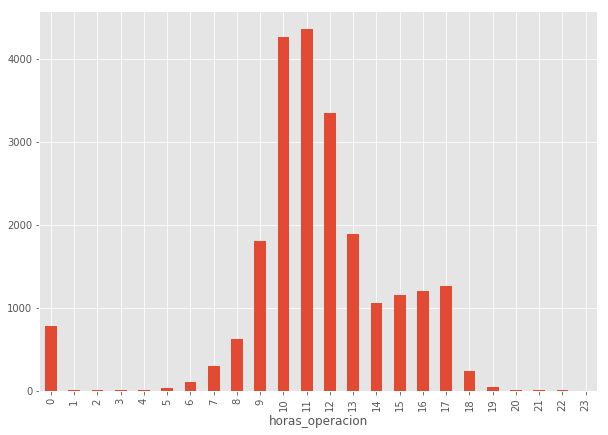

In [33]:
print("Distribución de los valores en columna horas operacion:")
data.groupby('horas_operacion')['horas_operacion'].count().plot(kind = "bar", figsize = (10, 7))

Distribución de los valores en columna pos en uso:


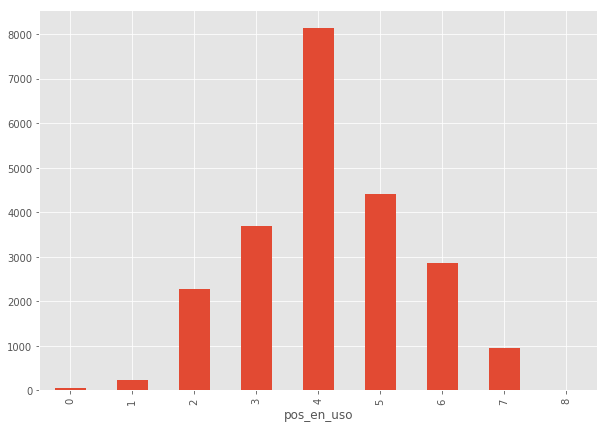

In [34]:
print("Distribución de los valores en columna pos en uso:")
data.groupby('pos_en_uso')['pos_en_uso'].count().plot(kind = "bar", figsize = (10, 7))

# TODO?

TODO


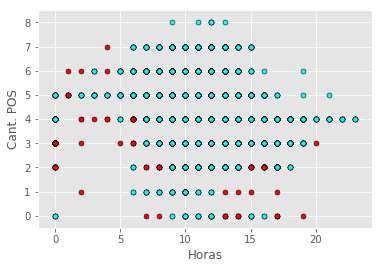

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["horas_operacion", "pos_en_uso"]])
    y = np.array(data["volumen"])
    alto = X[np.argwhere(y == "alto")]
    bajo = X[np.argwhere(y == "medio")]
    plt.scatter([s[0][0] for s in bajo], [s[0][1] for s in bajo], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in alto], [s[0][1] for s in alto], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Horas')
    plt.ylabel('Cant. POS')
    
plot_points(data)
print("TODO") #TODO Que representa este grafico?
plt.show()

# Pre-Procesado

## Convertir features de texto en numéricos (pero aún categóricos)

In [0]:
df = data.copy()  #Creamos una copia para mantener el DF original intacto
df['dia_de_la_semana'] = data['dia_de_la_semana'].replace(
    {'Lunes' : 0, 'Martes' : 1, 'Miercoles' : 2, 'Jueves' : 3, 'Viernes' : 4, 'Sabado' : 5, 'Domingo' : 6}
)
df['volumen'] = data['volumen'].replace({'alto' : 0, 'medio' : 1, 'bajo' : 2})
df['es_quincena'] = data['es_quincena'].replace({' VERDADERO ' : 1, ' FALSO ' : 0})

In [74]:
#Este caso especial primero cambiamos la palabra NO por un 0 y luego cambiamos cualquier otro valor por un 1
df['es_feriado'] = data['es_feriado'].replace({' NO ': 0})
df['es_feriado'] = df['es_feriado'].where(df['es_feriado'] == 0, other = 1)
df['es_feriado'].head(5)
print("Verificar resultado final:")
df.head(10)

Verificar resultado final:


,id_tienda,tipo_tienda,provincia,supervisor,mes_del_anio,semana_del_anio,es_quincena,es_feriado,dia_de_la_semana,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,volumen
0,12,FS,SAN JOSE,2015622_080,1,1,1,1,0,11,4,210,23.0,1
1,12,FS,SAN JOSE,2015622_080,1,1,1,0,1,11,4,306,17.0,0
2,12,FS,SAN JOSE,2015622_080,1,1,1,0,2,11,4,203,12.0,1
3,12,FS,SAN JOSE,2015622_080,1,1,0,0,3,11,4,192,13.0,1
4,12,FS,SAN JOSE,2015622_080,1,1,0,0,4,12,4,229,16.0,1
5,12,FS,SAN JOSE,2015622_080,1,1,0,0,5,15,4,225,22.0,1
6,12,FS,SAN JOSE,2015622_080,1,2,0,0,6,16,4,224,26.0,1
7,12,FS,SAN JOSE,2015622_080,1,2,0,0,0,12,4,179,14.0,1
8,12,FS,SAN JOSE,2015622_080,1,2,0,0,1,11,4,268,15.0,1
9,12,FS,SAN JOSE,2015622_080,1,2,0,0,2,10,4,215,15.0,1


Verificar resultado final:


,id_tienda,tipo_tienda,provincia,supervisor,mes_del_anio,semana_del_anio,es_quincena,es_feriado,dia_de_la_semana,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,volumen
0,12,FS,SAN JOSE,2015622_080,1,1,1,1,0,11,4,210,23.0,1
1,12,FS,SAN JOSE,2015622_080,1,1,1,0,1,11,4,306,17.0,0
2,12,FS,SAN JOSE,2015622_080,1,1,1,0,2,11,4,203,12.0,1
3,12,FS,SAN JOSE,2015622_080,1,1,0,0,3,11,4,192,13.0,1
4,12,FS,SAN JOSE,2015622_080,1,1,0,0,4,12,4,229,16.0,1
5,12,FS,SAN JOSE,2015622_080,1,1,0,0,5,15,4,225,22.0,1
6,12,FS,SAN JOSE,2015622_080,1,2,0,0,6,16,4,224,26.0,1
7,12,FS,SAN JOSE,2015622_080,1,2,0,0,0,12,4,179,14.0,1
8,12,FS,SAN JOSE,2015622_080,1,2,0,0,1,11,4,268,15.0,1
9,12,FS,SAN JOSE,2015622_080,1,2,0,0,2,10,4,215,15.0,1


## Eliminar outliers

Las variables que nos interesan son las de cantidad de clientes, comparamos clientes totales vs. VIP para cada día y decidimos borrar aquellos valores que exceden la norma, que dentro del conjunto de datos no iban a aportar mayor detalle.

Tamaño original: (22633, 14)
Tamaño después de borrado: (22623, 14)


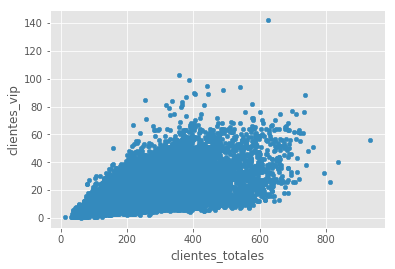

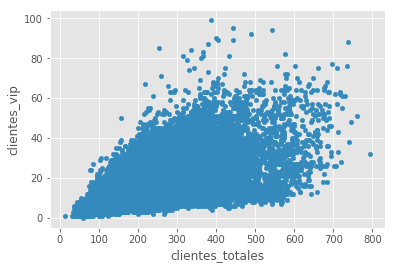

In [78]:
df.plot.scatter(x = 'clientes_totales', y = 'clientes_vip')
print("Tamaño original:", df.shape)
df1 = df[df.clientes_vip < 100]
df1 = df1[df1.clientes_totales < 800]
print("Tamaño después de borrado:", df1.shape)
df1.plot.scatter(x = 'clientes_totales', y = 'clientes_vip')

## Convertir datos categóricos - One-hot encoding

In [81]:
# One-hot encoding
df2 = pd.get_dummies(df1, columns=['mes_del_anio', 'dia_de_la_semana', 'volumen'])
df2.head()



,id_tienda,tipo_tienda,provincia,supervisor,semana_del_anio,es_quincena,es_feriado,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,mes_del_anio_1,mes_del_anio_2,mes_del_anio_3,mes_del_anio_4,mes_del_anio_5,mes_del_anio_6,mes_del_anio_7,mes_del_anio_8,mes_del_anio_9,mes_del_anio_10,mes_del_anio_11,mes_del_anio_12,dia_de_la_semana_0,dia_de_la_semana_1,dia_de_la_semana_2,dia_de_la_semana_3,dia_de_la_semana_4,dia_de_la_semana_5,dia_de_la_semana_6,volumen_0,volumen_1,volumen_2
0,12,FS,SAN JOSE,2015622_080,1,1,1,11,4,210,23.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,12,FS,SAN JOSE,2015622_080,1,1,0,11,4,306,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,12,FS,SAN JOSE,2015622_080,1,1,0,11,4,203,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,12,FS,SAN JOSE,2015622_080,1,0,0,11,4,192,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,12,FS,SAN JOSE,2015622_080,1,0,0,12,4,229,16.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Normalizar features horas_operacion y pos_en_uso

In [82]:
# Normalizando horas_operacion y pos_en_uso para el intervalo 0 a 1
df2["horas_operacion"] = df2["horas_operacion"]/24
df2["pos_en_uso"] = df2["pos_en_uso"]/10
df2.head(10)

,id_tienda,tipo_tienda,provincia,supervisor,semana_del_anio,es_quincena,es_feriado,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,mes_del_anio_1,mes_del_anio_2,mes_del_anio_3,mes_del_anio_4,mes_del_anio_5,mes_del_anio_6,mes_del_anio_7,mes_del_anio_8,mes_del_anio_9,mes_del_anio_10,mes_del_anio_11,mes_del_anio_12,dia_de_la_semana_0,dia_de_la_semana_1,dia_de_la_semana_2,dia_de_la_semana_3,dia_de_la_semana_4,dia_de_la_semana_5,dia_de_la_semana_6,volumen_0,volumen_1,volumen_2
0,12,FS,SAN JOSE,2015622_080,1,1,1,0.458333,0.4,210,23.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,12,FS,SAN JOSE,2015622_080,1,1,0,0.458333,0.4,306,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,12,FS,SAN JOSE,2015622_080,1,1,0,0.458333,0.4,203,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,12,FS,SAN JOSE,2015622_080,1,0,0,0.458333,0.4,192,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,12,FS,SAN JOSE,2015622_080,1,0,0,0.500000,0.4,229,16.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,12,FS,SAN JOSE,2015622_080,1,0,0,0.625000,0.4,225,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,12,FS,SAN JOSE,2015622_080,2,0,0,0.666667,0.4,224,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7,12,FS,SAN JOSE,2015622_080,2,0,0,0.500000,0.4,179,14.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,12,FS,SAN JOSE,2015622_080,2,0,0,0.458333,0.4,268,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9,12,FS,SAN JOSE,2015622_080,2,0,0,0.416667,0.4,215,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Borrar NaNs

In [84]:
print ("Shape antes: ", df2.shape)
print ("Hay Nans? ", df2.isnull().values.any())   #preguntar si hay NaN
# remove NaNs
df2 = df2.dropna()
print ("Shape después: ", df2.shape)

Shape antes:  (22623, 33)
Hay Nans?  False
Shape después:  (22623, 33)


## Elección de columnas (features)

Para este corte se elimina todas las columnas que brindan info específica de tiendas pues solamente se analizará una tienda.

La columna semana del año y mes del año no brindan mayor información en conjunto, es posible que sean redundantes por lo que probaremos removiendo una de ellas.

In [87]:
cols_to_drop = ['id_tienda', 'tipo_tienda', 'provincia', 'supervisor', 'semana_del_anio']

processed = df2.drop(cols_to_drop, 1)
print("Tamaño post-procesamiento:", processed.shape)
processed.head(5)

Tamaño post-procesamiento: (22623, 28)


,es_quincena,es_feriado,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,mes_del_anio_1,mes_del_anio_2,mes_del_anio_3,mes_del_anio_4,mes_del_anio_5,mes_del_anio_6,mes_del_anio_7,mes_del_anio_8,mes_del_anio_9,mes_del_anio_10,mes_del_anio_11,mes_del_anio_12,dia_de_la_semana_0,dia_de_la_semana_1,dia_de_la_semana_2,dia_de_la_semana_3,dia_de_la_semana_4,dia_de_la_semana_5,dia_de_la_semana_6,volumen_0,volumen_1,volumen_2
0,1,1,0.458333,0.4,210,23.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0.458333,0.4,306,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,0,0.458333,0.4,203,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,0.458333,0.4,192,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0.500000,0.4,229,16.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Inicia el trabajo con los modelos elegidos, que serán:
   **DecisionTree**

   **RandomForest**
   
   **Redes Neuronales ANN**

In [0]:
# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,0:18]
X = X.astype('float32')
y = keras.utils.to_categorical(data["volumen"],3)

Determinar cuáles columnas son features y cuáles labels.

En este caso las clases están dadas por "volumen" que indica si es un día alto volumen (cantidad de clientes), medio o bajo

In [0]:

# Splitting the data input into X, and the labels y 
features = np.array(processed_data)[:,0:18]
features = features.astype('float32')
labels = keras.utils.to_categorical(data["volumen"],3)

print("Shape of features:", features.shape)
print("\nShape of labels:", labels.shape)
print("\nFirst 5 rows of features")
print(features[:5])
print("\nFirst 5 rows of labels")
print(labels[:5])



Shape of features: (22633, 18)

Shape of labels: (22633, 3)

First 5 rows of features
[[0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.        ]
 [0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.        ]
 [0.45833334 0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.        ]
 [0.5        0.4        1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1. 

Separa set de entrenamiento y set de pruebas
Con una proporción 75% - 25%

In [0]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state = 13) 

In [0]:
print ("shape del dataset completo: ", processed_data.shape)
print ("\nshape del set de entrenamiento: ", X_train.shape)
print ("\nshape del set de pruebas: ", y_test.shape)

shape del dataset completo:  (22633, 21)

shape del set de entrenamiento:  (16974, 18)

shape del set de pruebas:  (5659, 3)


## Modelo clasificador usando DecisionTree

In [0]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=10,min_samples_leaf=12)

#entrenamiento
print(DecisionTreeModel.fit(X_train, y_train))

#prediccion (usar datos de test)
y_predict = DecisionTreeModel.predict(X_test)

print("\nAccuracy para DecisionTree: {:.4f}".format(accuracy_score(y_test, y_predict)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy para DecisionTree: 0.8597


## Modelo clasificador usando RandomForest

In [0]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3, min_samples_split=10, n_estimators=290, max_depth = 14, random_state = 10)

#entrenamiento
print(RandomForestModel.fit(X_train, y_train))

#prediccion (usar datos de test)
y_predict = RandomForestModel.predict(X_test)

print("\nAccuracy para Random Forest:     {:.4f}".format(accuracy_score(y_test, y_predict)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=290,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

Accuracy para Random Forest:     0.8669


### Podríamos decir que Random Forest tuvo el mejor score que Decision Tree (86.69% vrs 85.97)

### Mejores resultados para DecisionTree

Método | Features | Profundidad Max | Resultado | Mejores resultados
------------ | ------------- | ------------- | ------------- | ------------- 
DT | 7 | 5| 78.95% | 
DT | 7 | 9 | 85.97% | 
DT | 7 | 12 | 86.08% | 
DT | 7 | 13 | 86.15% |  ** mejor en v1
-- | -- | -- | -- | 
DT | 5 | 3 | 77.38% | 
DT | 5 | 8 | 84.94% | 
DT | 5 | 10 | 85.97% | ** mejor en v2
DT | 5 | 12 | 85.65% | 

### Mejores resultados para RandomForest

Método | Features | Leaf | Split | Estimators | Profundidad Max | Resultado  | Mejores resultados
------------ | ------------- | ------------- | -------------  | -------------  | -------------  | -------------  | ------------- 
RF | 7 | 3 | 17 | 290 | None | 86.46% |  ** mejor en v1
RF | 7 | 3 | 10 | 290 | 14 | 86.22% | 
RF | 7 | 3 | 13 | 290 | 15 | 86.38% |
-- | -- | -- | -- |  -- |  -- |  -- |
RF | 5 | 3 | 10 | 290 | None | 86.62% |
RF | 5 | 3 | 10 | 290 | 14 | 86.69% | ** mejor en v2
RF | 5 | 3 | 10 | 300 | None | 86.61% | 
RF | 5 | 5 | 10 | 300 | None | 86.46% | 
RF | 5 | 10 | 10 | 300 | None | 86.43% |



## Modelo clasificador usando Redes Neuronales

In [0]:
#FALTA...